In [12]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from keras import layers
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

%matplotlib inline

In [13]:
# Load the data
train_data = pd.read_csv(f"C:\\Users\\Arun\\Desktop\\kaggle\\digit-recognizer\\train.csv")
test_data = pd.read_csv(f"C:\\Users\\Arun\\Desktop\\kaggle\\digit-recognizer\\test.csv")

In [14]:
print('Train '+ str(train_data.shape))
print('Test '+ str(test_data.shape))

Train (42000, 785)
Test (28000, 784)


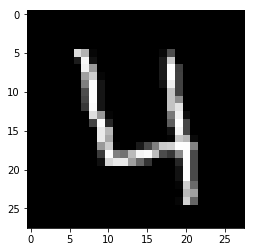

In [15]:
y_data = train_data['label']
#y_data = pd.get_dummies(y_data)
X_data = train_data.drop('label',axis=1)
del train_data
plt.imshow(X_data.iloc[3].values.reshape(28,28), cmap='gist_gray')

In [16]:
#Normalize
X_data = X_data / 255.0
test_data = test_data / 255.0

# Reshape
X_data = X_data.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

# convert to one-hot-encoding
y_data = to_categorical(y_data, num_classes = 10)

In [17]:
# training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_data, y_data, test_size = 0.1, random_state=2)

In [18]:
def DigitRecognizerModel(input_shape):
    """
    Implementation of the DigitRecognizerModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    # input placeholder with shape input_shape
    X_input = Input((28,28,1))
    
    # layer 1
    X = Conv2D(8, (5, 5), strides = (1, 1), name = 'conv0', padding='same', activation='relu')(X_input)
    X = MaxPooling2D(pool_size=(2,2),name='maxpool')(X)
    X = Dropout(0.25)(X)
    
    # layer 2
    X = Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu')(X)
    X = MaxPooling2D(pool_size=(2,2), strides=(2,2))(X)
    X = Dropout(0.25)(X)
    
    # layer 3
    X = Flatten()(X)
    X = Dense(256, activation = "relu")(X)
    X = Dropout(0.25)(X)
    
    # output layer
    X = Dense(10, activation = "softmax")(X)
    
    # model
    model = Model(inputs = X_input, outputs = X, name='DigitRecognizerModel')
    
    return model

In [19]:
# create model
model = DigitRecognizerModel(X_train.shape[1:4])

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=["accuracy"])

In [21]:
model.fit(x=X_train,y=Y_train,batch_size=16,epochs=20)

Epoch 1/20
37800/37800 [==============================] - 44s 1ms/step - loss: 0.0471 - acc: 0.9833
Epoch 2/20
37800/37800 [==============================] - 45s 1ms/step - loss: 0.0215 - acc: 0.9924
Epoch 3/20
37800/37800 [==============================] - 44s 1ms/step - loss: 0.0176 - acc: 0.9938
Epoch 4/20
37800/37800 [==============================] - 45s 1ms/step - loss: 0.0151 - acc: 0.9948
Epoch 5/20
37800/37800 [==============================] - 44s 1ms/step - loss: 0.0133 - acc: 0.9955
Epoch 6/20
37800/37800 [==============================] - 41s 1ms/step - loss: 0.0126 - acc: 0.9957
Epoch 7/20
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0111 - acc: 0.9963
Epoch 8/20
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0108 - acc: 0.9963
Epoch 9/20
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0103 - acc: 0.9965
Epoch 10/20
37800/37800 [==============================] - 44s 1ms/step - loss: 0.0102 - acc: 0.9966

In [22]:
# evaluate model using validation data set
preds = model.evaluate(x=X_val,y=Y_val)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4200/4200 [==============================] - 2s 453us/step
Loss = 0.008654725619784412
Test Accuracy = 0.9974285663877215


In [23]:
output = pd.read_csv(f"C:\\Users\\Arun\\Desktop\\kaggle\\digit-recognizer\\sample_submission.csv")

In [25]:
# predict test data
Y_pred = model.predict(test_data)
output['Label'] = np.argmax(Y_pred,axis = 1)

In [26]:
output.to_csv('submission.csv',index=False)

adapted from https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial